In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_results(run_name, is_temp=False, is_sep=True):
    results = {}
    if is_temp:
        time_ranges = ['all','2d','5d','13d', 'noDS']
    else:
        time_ranges = ['all']
    if is_sep:
        evaluation_types = ['both', 'diag', 'proc']
        for time_range in time_ranges:
            results[time_range] = {}
            for eval_type in evaluation_types:
                results[time_range][eval_type] = pd.read_csv(run_name+'_'+time_range+'_'+eval_type +'.csv')
    else:
        for time_range in time_ranges:
            results[time_range] = pd.read_csv(run_name+'_'+time_range+'.csv')
    return results

In [12]:
def plot_training(results):
    time_ranges = results.keys()
    if type(results['all']) == dict:
        evaluation_types = results['all'].keys()
        for time_range in time_ranges:
            for eval in evaluation_types:
                plt.plot(results[time_range][eval]['validation_f1_micro'], label=time_range+'_'+eval)
                # plt.plot(results[time_range][eval]['validation_metrics_sample_size'], label=time_range+'_'+eval)
                # plt.plot(results[time_range][eval]['validation_num_labels'], label=time_range+'_'+eval)

    else:
        for time_range in time_ranges:
            plt.plot(results[time_range]['validation_f1_micro'], label=time_range)
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Micro-F1 score')
    plt.show()
    return results

In [25]:
# write code to visualize the validation_f1_score for each time range in the last epoch

def plot_performance(res, eval_type=None):
    if eval_type is None:
        plt.bar(range(len(results)), [results[key]['validation_f1_micro'].max() for key in results.keys()], align='center')
        plt.xticks(range(len(results)), list(results.keys()))
        # display value on top of each bar
        for i, v in enumerate([results[key]['validation_f1_micro'].max() for key in results.keys()]):
            plt.text(i - 0.1, v + 0.01, str(round(v, 3)))
        # create another line plot for the number of samples in each time range
        # the plot should have the same x-axis as the bar plot
        # creating a twin Axes sharing the x-axis
        ax2 = plt.twinx()
        ax2.plot(range(len(results)), [results[key]['validation_metrics_sample_size'].iloc[-1] for key in results.keys()], color='red')
        plt.xticks(range(len(results)), list(results.keys()))

        # display value on top of each bar
        for i, v in enumerate([results[key]['validation_metrics_sample_size'].iloc[-1] for key in results.keys()]):
            plt.text(i - 0.1, v - 2, str(round(v, 3)),color="r")
        plt.legend(['Number of samples'])

        plt.ylabel('Micro-F1 score')
        plt.xlabel('Time range')
        plt.title('Micro-F1 score for each time range (16 chunks)')
        plt.show()
    else:
        plt.bar(range(len(results)), [results[key][eval_type]['validation_f1_micro'].max() for key in results.keys()], align='center')
        plt.xticks(range(len(results)), list(results.keys()))
        # display value on top of each bar
        for i, v in enumerate([results[key][eval_type]['validation_f1_micro'].max() for key in results.keys()]):
            plt.text(i - 0.1, v + 0.01, str(round(v, 3)))
        # create another line plot for the number of samples in each time range
        # the plot should have the same x-axis as the bar plot
        # creating a twin Axes sharing the x-axis
        ax2 = plt.twinx()
        ax2.plot(range(len(results)), [results[key][eval_type]['validation_metrics_sample_size'].iloc[-1] for key in results.keys()], color='red')
        plt.xticks(range(len(results)), list(results.keys()))

        # display value on top of each bar
        for i, v in enumerate([results[key][eval_type]['validation_metrics_sample_size'].iloc[-1] for key in results.keys()]):
            plt.text(i - 0.1, v - 2, str(round(v, 3)),color="r")
        plt.legend(['Number of samples'])

        plt.ylabel('Micro-F1 score')
        plt.xlabel('Time range')
        plt.title('Micro-F1 score for each time range (16 chunks)')
        plt.show()


In [6]:
results = get_results(run_name, is_temp=False, is_sep=True)

In [10]:
results['all']['diag']

,Unnamed: 0.1,Unnamed: 0,validation_f1_macro,validation_f1_micro,validation_f1_by_class,validation_num_labels,validation_metrics_sample_size,train_f1_macro,train_f1_micro,train_f1_by_class,...,final_aggregation,only_discharge_summary,patience_threshold,max_epochs,save_model,load_from_checkpoint,checkpoint_name,evaluate_temporal,use_multihead_attention,debug
0,0,NaN,0.08,0.148148,[0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. ...,50.0,1.0,0.270116,0.281818,[0.72727273 0.52631579 0.44444444 0.35294118 0...,...,cls,False,3.0,20.0,False,False,Run_all_notes_last_second_transf,False,False,True


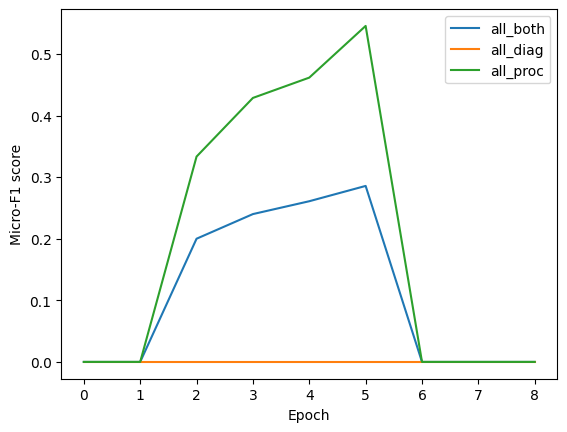

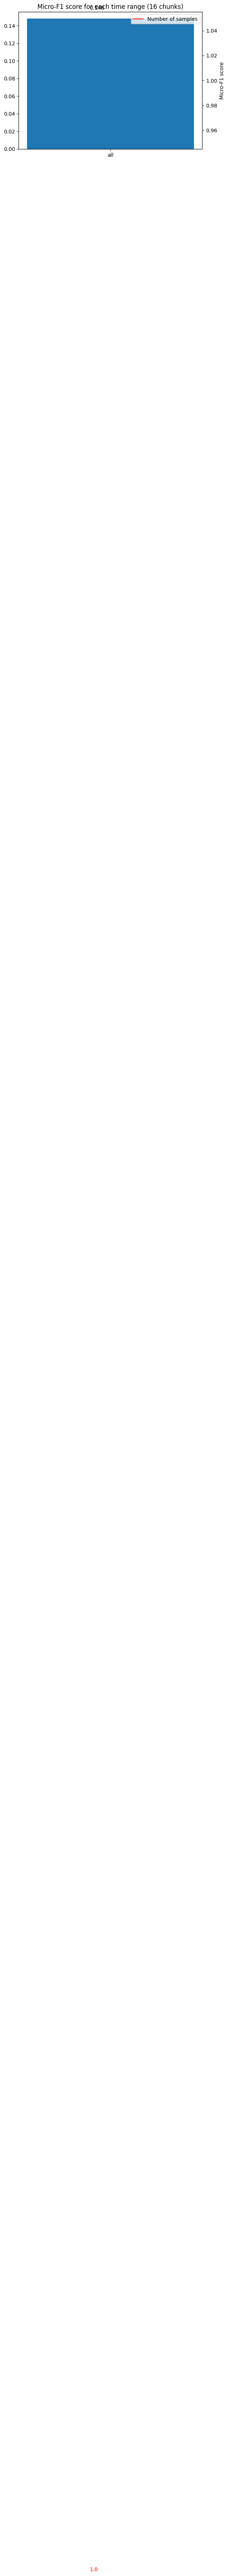

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# run_name = 'results/Definitive_temp_4'
run_name = 'results/Backprop'
plot_training(get_results(run_name, is_temp=False, is_sep=True))
plot_performance(get_results(run_name, is_temp=False, is_sep=True), eval_type='diag')


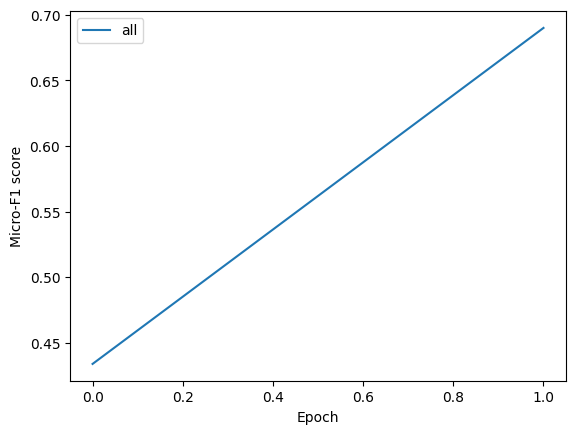

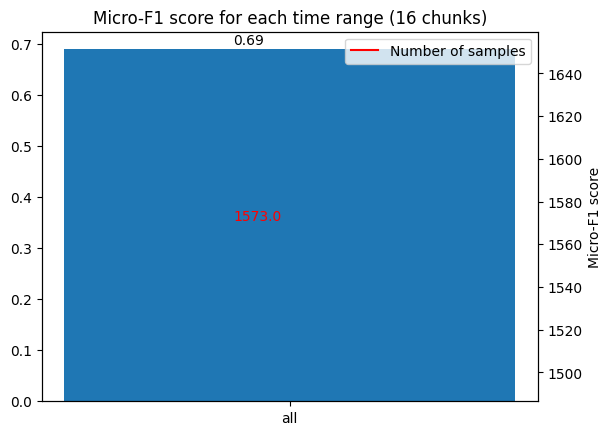

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# run_name = 'results/Definitive_temp_4_'
run_name = 'results/Grad_Select_16_chunks'a

plot_training(get_results(run_name, is_temp=False))
plot_performance(get_results(run_name, is_temp=False))


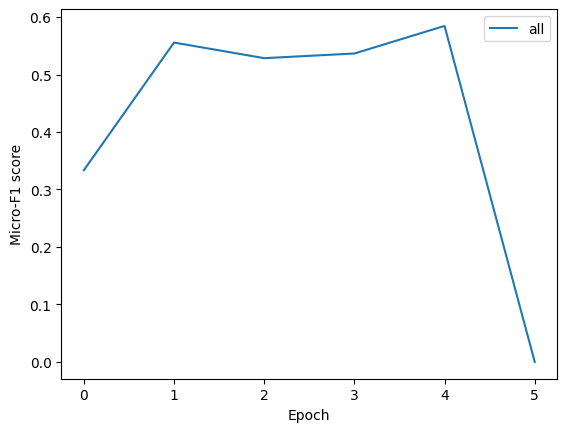

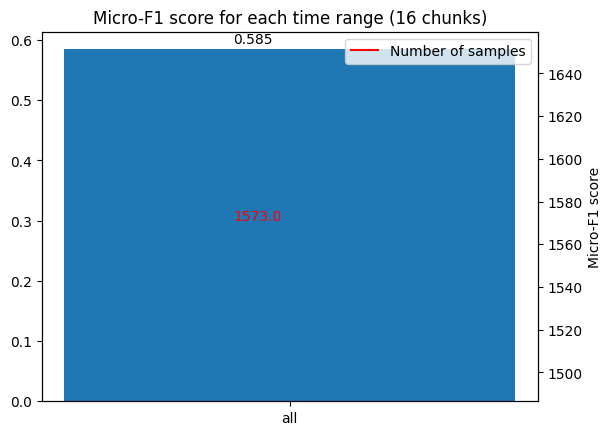

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# run_name = 'results/Definitive_temp_4_'
run_name = 'results/Grad_Select_4_chunks'
plot_training(get_results(run_name, is_temp=False))
plot_performance(get_results(run_name, is_temp=False))


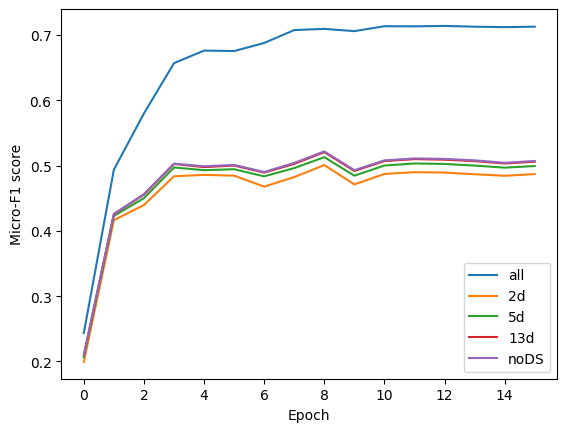

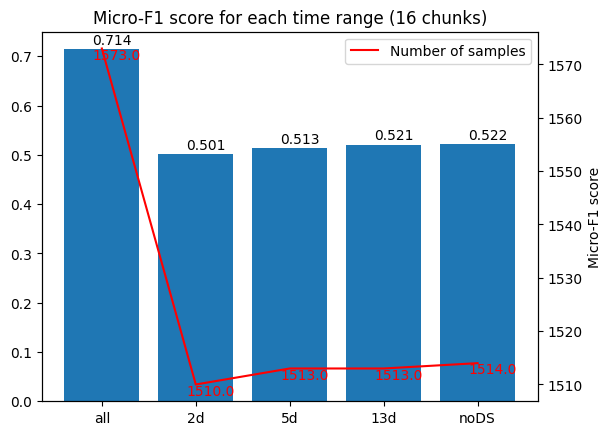

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# run_name = 'results/Definitive_temp_4_'
run_name = 'results/Bug_fix_temp_16_chunks'
plot_training(get_results(run_name, is_temp=True))
plot_performance(get_results(run_name, is_temp=True))


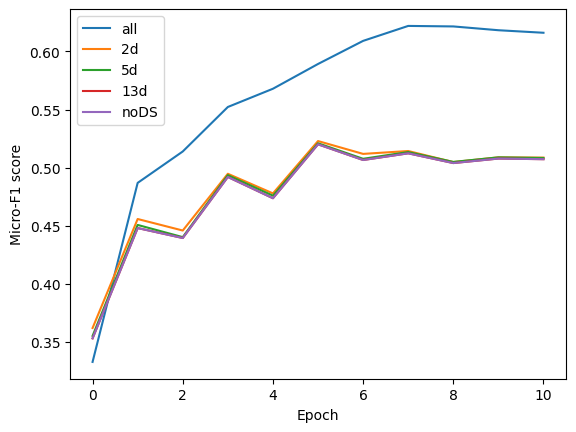

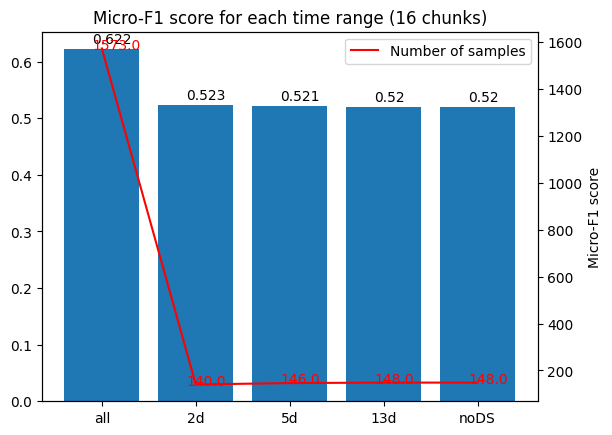

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# run_name = 'results/Definitive_temp_4_'
run_name = 'results/Definitive_temp_4'
plot_training(get_results(run_name, is_temp=True))
plot_performance(get_results(run_name, is_temp=True))


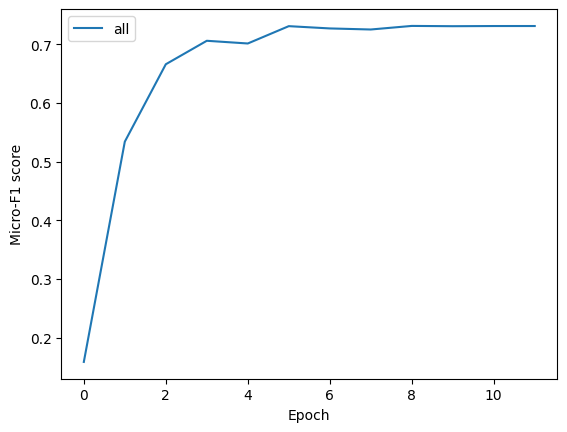

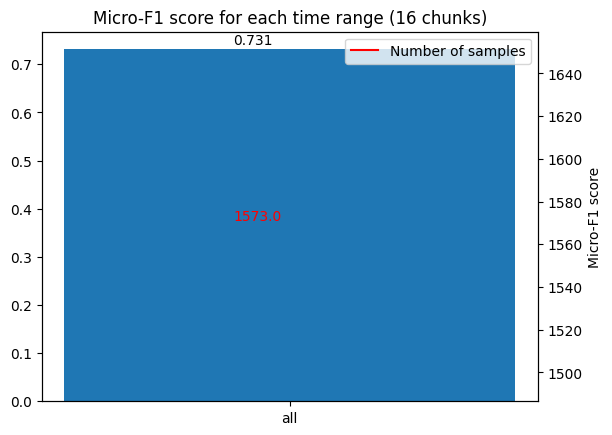

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# run_name = 'results/Definitive_temp_4_'
run_name = 'results/Bug_fix_no_temp_16_chunks'
plot_training(get_results(run_name, is_temp=False))
plot_performance(get_results(run_name, is_temp=False))